## Code to Chapter 10 of LangChain for Life Science and Healthcare book, by Dr. Ivan Reznikov

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1-A-ik6EzznHFO5XtlvRa-wlONn1F23fi?usp=sharing)

## No/Low Code Add-ons

This notebook demonstrates how to set up and run popular no/low-code AI workflow tools in Google Colab. We'll explore three powerful platforms: **Flowise**, **Langflow**, and **n8n** - each offering visual, drag-and-drop interfaces for building AI applications without extensive coding.

## Overview of Tools

- **Flowise**: A visual tool for building LLM (Large Language Model) applications with a flowchart-style interface
- **Langflow**: A UI for LangChain workflows, allowing you to create complex AI pipelines visually  
- **n8n**: A workflow automation tool that can integrate AI services with various APIs and databases

## Configuration Setup

First, we set up configuration flags to control which tools to run.

Set one of the flags to `True` for the tool you want to experiment with:

In [ ]:
RUN_FLOWISE = False
RUN_LANGFLOW = False
RUN_N8N = False

## Installing Node.js

Both Flowise and n8n are Node.js applications, so we need to install Node.js first:


In [ ]:
if RUN_FLOWISE or RUN_N8N:
    !curl -sL  https://deb.nodesource.com/setup_20.x | sudo -E bash -
    !sudo apt-get install -y nodejs

This installs the latest LTS version of Node.js, which is required for running JavaScript-based applications.

## Setting Up Ngrok for Public Access

`ngrok` is a cross-platform application that enables developers to expose a local development server to the Internet with minimal effort.
In order to run Flowise/Langflow in Colab, we'll need to pass Auth:
1. Go to https://dashboard.ngrok.com/get-started/your-authtoken
2. Save the token to Notebook Secrets

Since we're running in Colab, we need ngrok to expose our local servers to the internet:

If you're running the notebook on your laptop, you may skip this step and launch the tool server locally

In [ ]:
!pip install pyngrok

### Ngrok Authentication

Ngrok requires authentication to create public tunnels.

**Important Setup Step**:
1. Go to https://dashboard.ngrok.com/get-started/your-authtoken
2. Copy your authentication token
3. In Colab, go to the key icon (🔑) on the left sidebar
4. Add a new secret named `NGROK_TOKEN` with your token value

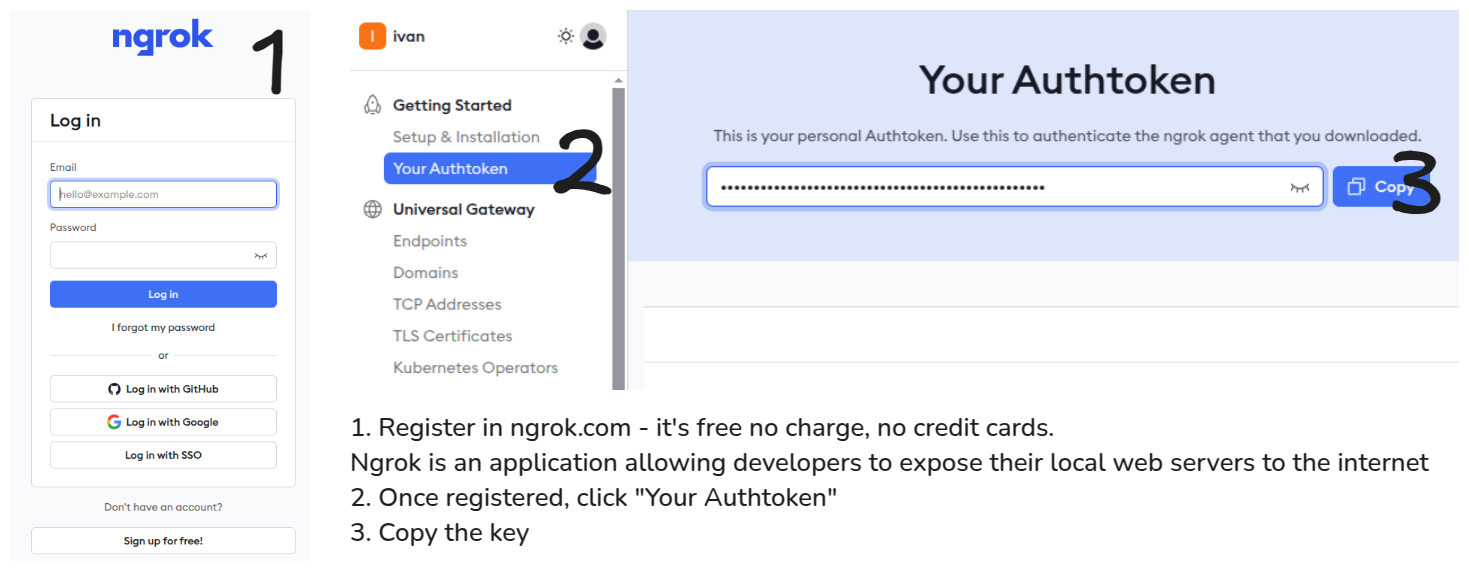

In [ ]:
from google.colab import userdata

NGROK_TOKEN = userdata.get("NGROK_TOKEN")

In [ ]:
!ngrok config add-authtoken $NGROK_TOKEN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

## Installing Flowise

Flowise is installed globally via npm:


In [ ]:
if RUN_FLOWISE:
    !npm install -g flowise

Flowise provides a visual interface for building LLM applications by connecting different components like document loaders, text splitters, vector stores, and language models.

## Running Flowise

### Creating Public URL for Flowise


In [ ]:
if RUN_FLOWISE:
    public_url = ngrok.connect(3000)
    print(public_url)

This creates a public URL that you can access from any browser. The URL will look like `https://abc123.ngrok.io`.

### Starting Flowise Server

**What to expect**:
- The server will start and display "Flowise Server is listening at :3000"
- Click the ngrok URL printed above to access the Flowise interface
- You'll see a visual canvas where you can drag and drop components to build AI workflows

In [ ]:
if RUN_FLOWISE:
    !npx flowise start

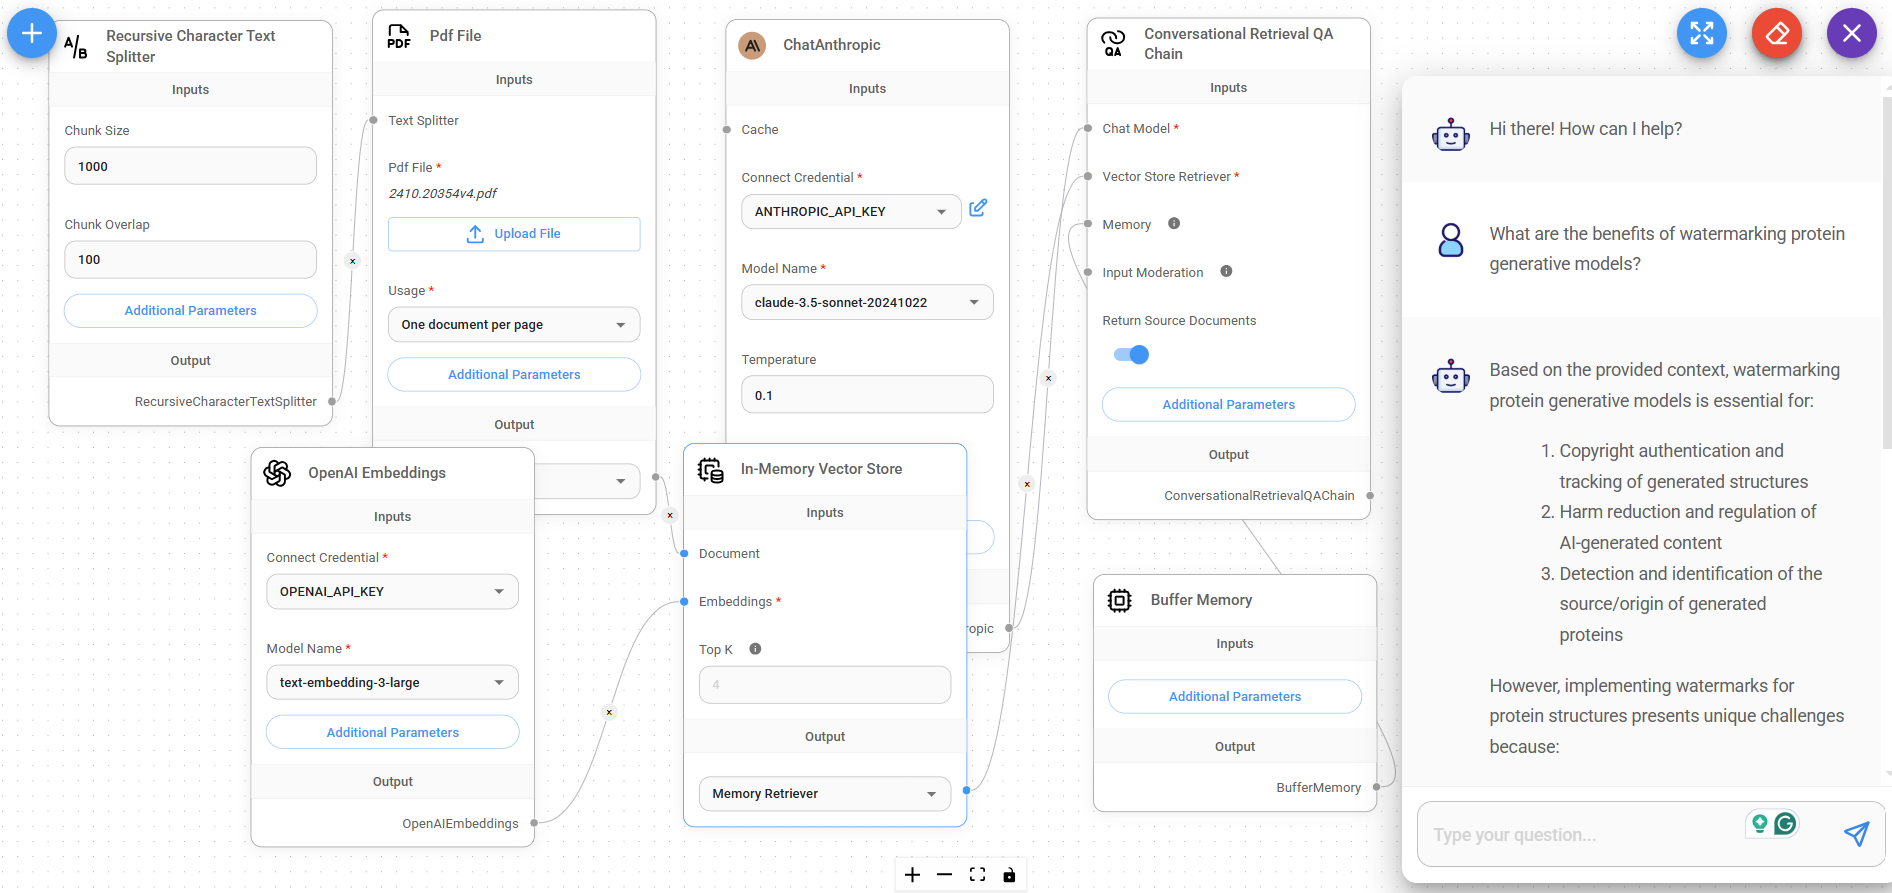

## Running Langflow

### Installing Langflow
We install a specific version (1.1.0) to ensure compatibility and stability.

In [ ]:
if RUN_LANGFLOW:
    !pip install langflow==1.1.0 -q

### Setting Up Langflow Access


In [ ]:
if RUN_LANGFLOW:
    public_url = ngrok.connect(7860)
    print(public_url)

### Starting Langflow

**What to expect**:
- Langflow will start on port 7860
- Access it through the ngrok URL to see the visual LangChain workflow builder
- You can create flows by connecting LangChain components visually

In [ ]:
if RUN_LANGFLOW:
    !python -m langflow run

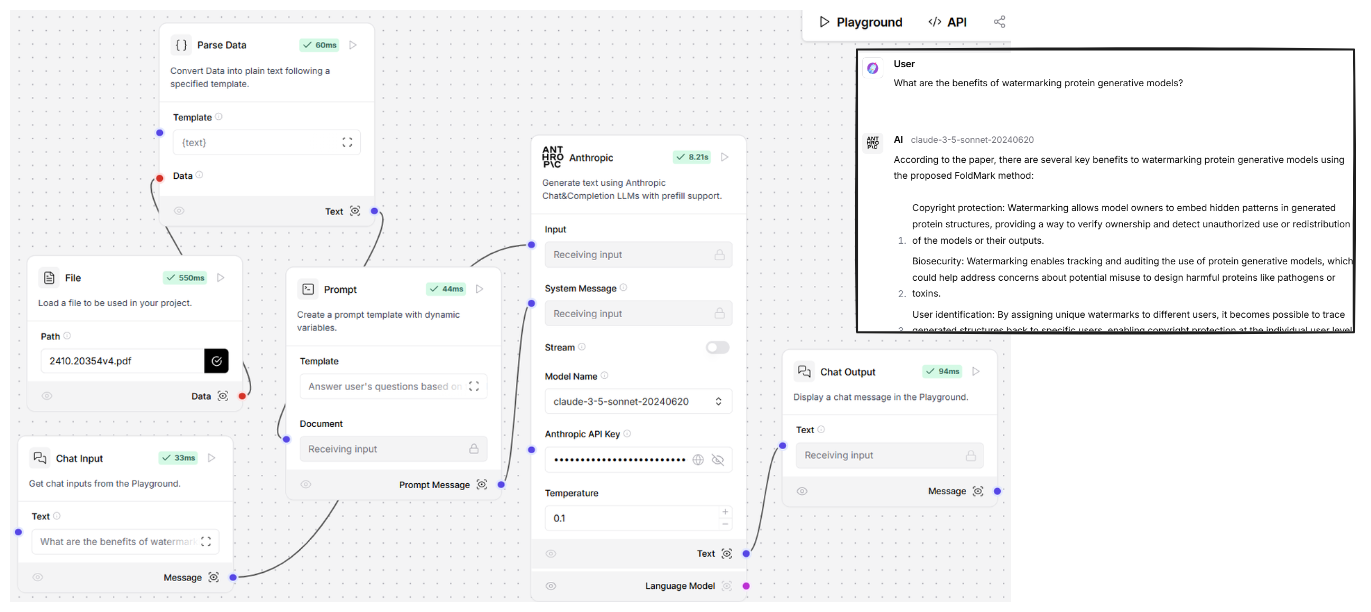

## Running n8n

### Installing n8n

In [ ]:
if RUN_N8N:
    !npm install -g n8n

### Setting Up n8n Access

In [ ]:
if RUN_N8N:
    public_url = ngrok.connect(5678)
    print(public_url)

### Setting Up n8n Access

**What to expect**:
- n8n will start on port 5678
- The interface provides workflow automation capabilities
- You can integrate AI services with databases, APIs, and other tools

In [ ]:
if RUN_N8N:
    !n8n start

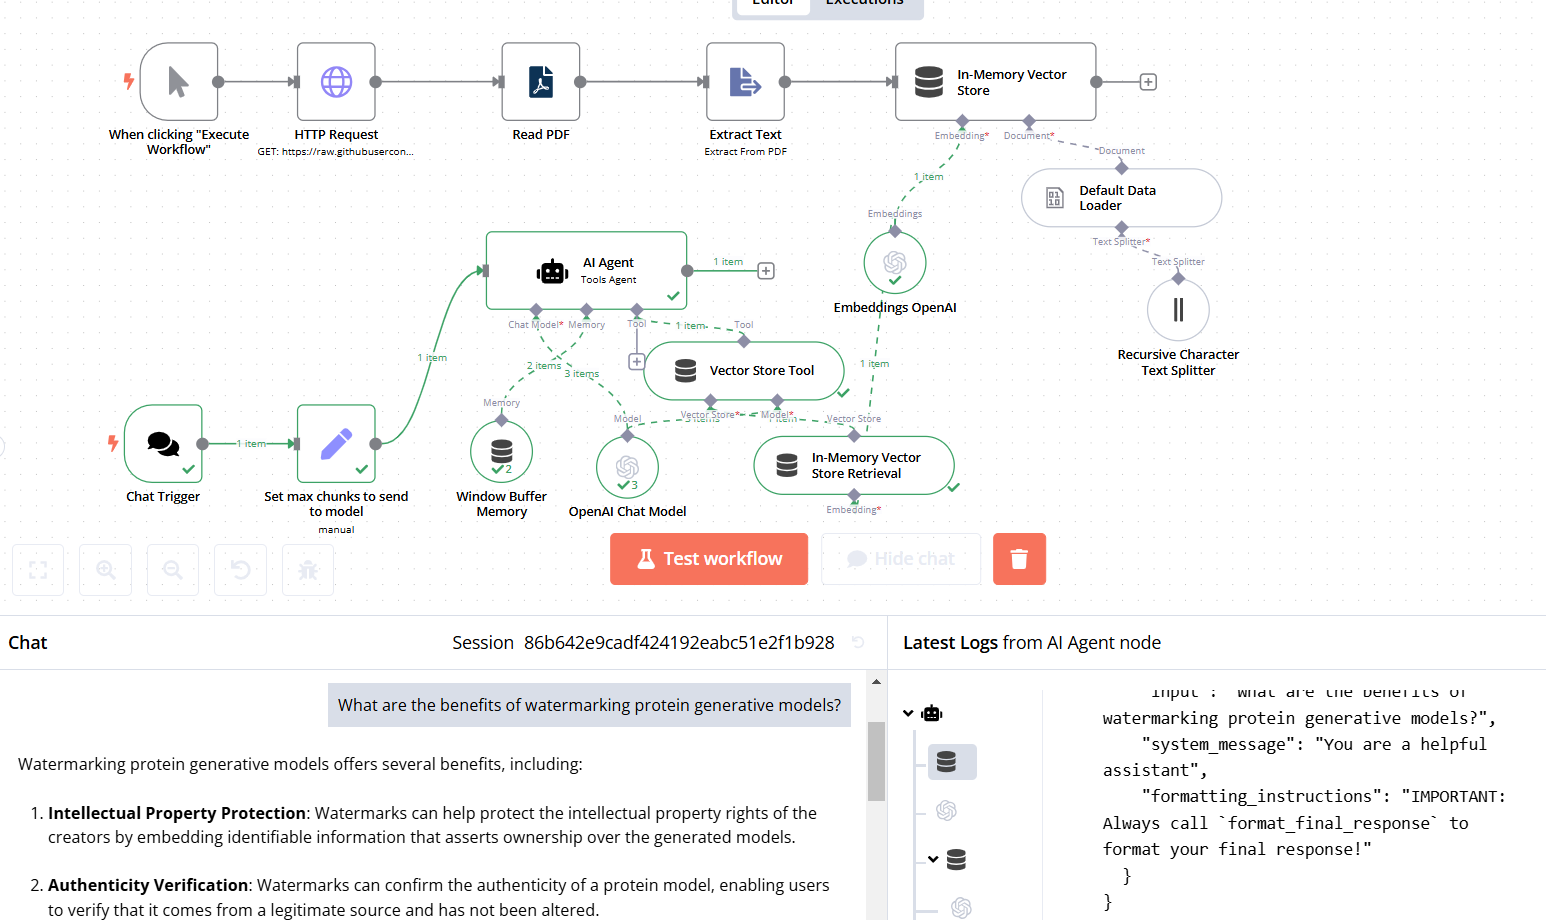

## Usage Tips

### Getting Started
1. **Choose one tool** to start with by setting its flag to `True`
2. **Run all cells** in sequence
3. **Click the ngrok URL** once the server starts
4. **Explore the interface** - each tool has tutorials and templates

### Common Use Cases
- **Flowise**: Building chatbots, document Q&A systems, AI agents
- **Langflow**: Creating complex LangChain pipelines visually
- **n8n**: Automating workflows that combine AI with business processes

### Troubleshooting
- If a tool won't start, try restarting the Colab runtime
- Make sure only one tool is enabled at a time
- Verify your ngrok token is correctly set in Colab secrets
- Check that the ngrok URL is accessible from your browser

## Next Steps

Once you have these tools running, you can:
1. **Import existing templates** to see example workflows
2. **Connect your own AI models** and APIs
3. **Build custom integrations** for your specific use cases
4. **Export configurations** to deploy in production environments

These no/low-code tools democratize AI development, making it accessible to users without extensive programming backgrounds while still providing the flexibility to create sophisticated AI applications.